In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"/content/archive (2).zip")

In [3]:
data.dropna(inplace=True)
print("Data after cleaning:")
print(data.head())

Data after cleaning:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data = data[selected_features]
print("\nData after feature selection/engineering:")
print(data.head())


Data after feature selection/engineering:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

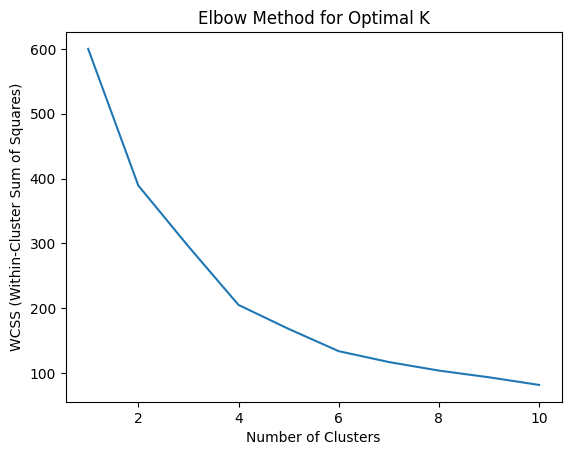

In [9]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [10]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

In [11]:
data['Cluster'] = clusters

print(data)

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        2
2     20                  16                       6        3
3     23                  16                      77        2
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        4
196   45                 126                      28        0
197   32                 126                      74        4
198   32                 137                      18        0
199   30                 137                      83        4

[200 rows x 4 columns]
